In [9]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_read_pd = pd.read_csv(city_data_to_load)
ride_read_pd = pd.read_csv(ride_data_to_load)

In [10]:
city_read_pd.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [11]:
ride_read_pd.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [13]:
# Combine the data into a single dataset
#left table is the boss
merged_df = pd.merge(ride_read_pd, city_read_pd, on="city", how="left")

In [27]:
# Display the data table for preview
merged_df.head(3)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban


In [38]:
# Obtain the x and y coordinates for each of the three city types
# dataframe per city
urban_type_df = merged_df.loc[merged_df["type"] == "Urban", :]
urban_type_df.head(3)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban


In [39]:
suburban_type_df = merged_df.loc[merged_df["type"] == "Suburban", :]
suburban_type_df.head(3)

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2018-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2018-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2018-01-17 21:33:35,21.71,966911700371,22,Suburban


In [54]:
rural_type_df = merged_df.loc[merged_df["type"] == "Rural", :]
rural_type_df.head(3)

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2018-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2018-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2018-03-27 18:27:34,54.85,4421836952718,6,Rural


In [80]:
# Obtain the x and y coordinates for each of the three city types
x_urban_rideId = urban_type_df.groupby(["city"]).count()["ride_id"]
y_urban_fare = urban_type_df.groupby(["city"]).mean()["fare"]

In [81]:
x_suburban_rideId = suburban_type_df.groupby(["city"]).count()["ride_id"]
y_suburban_fare = suburban_type_df.groupby(["city"]).mean()["fare"]

In [82]:
x_rural_rideId = rural_type_df.groupby(["city"]).count()["ride_id"]
y_rural_fare = rural_type_df.groupby(["city"]).mean()["fare"]

In [87]:
# sizing marks
urban_size = urban_type_df.groupby(["city"]).mean()["driver_count"]
suburban_size = suburban_type_df.groupby(["city"]).mean()["driver_count"]
rural_size = rural_type_df.groupby(["city"]).mean()["driver_count"]

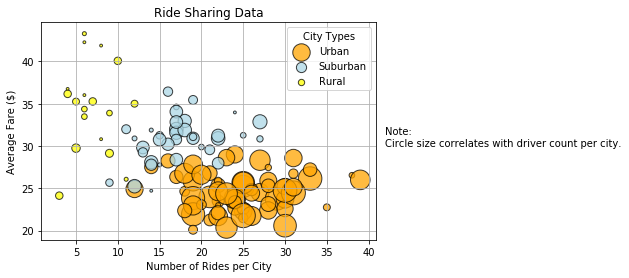

In [107]:
# Build the scatter plots for each city types
plt.scatter(x_urban_rideId, y_urban_fare, label="Urban", marker="o", color=["orange"], edgecolor="black", s=urban_size*8, alpha=0.75)
plt.scatter(x_suburban_rideId, y_suburban_fare, label="Suburban", marker="o", color=["lightblue"], edgecolor='black', s=suburban_size*8, alpha=0.75)
plt.scatter(x_rural_rideId, y_rural_fare, label="Rural", marker="o", color=["yellow"],edgecolor='black', s=rural_size*8, alpha=0.75)
plt.grid()

# Incorporate the other graph properties: labels, titles
plt.xlabel("Number of Rides per City")
plt.ylabel("Average Fare ($)")
plt.title("Ride Sharing Data")

# Create a legend
legend = plt.legend(fontsize= 10, title="City Types", loc="best")

# Incorporate a text label regarding circle size
plt.text(42,30,"Note: \nCircle size correlates with driver count per city.")

# Save Figure
plt.savefig("PyberStarterMonicaPlot.png")

# Show plot
plt.show()


In [111]:
# In addition, you will be expected to produce the following three pie charts:
# * % of Total Fares by City Type
groupby_citytype = merged_df.groupby(["type"])
fareSum_pertype = groupby_citytype.sum()["fare"]
fareSum_pertype.head()

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

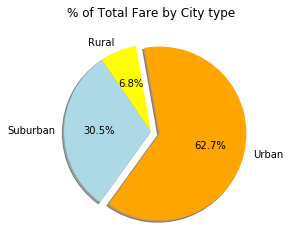

In [124]:
labels = ["Rural","Suburban","Urban"]
explode = (0,0,0.1)
colors = ["yellow", "lightblue","orange"]
plt.title("% of Total Fare by City type")
plt.pie(fareSum_pertype, explode=explode, labels=labels, colors=colors, autopct="%.1f%%", shadow=True, startangle=100)
plt.show()

In [120]:
# * % of Total Rides by City Type
rides_pertype = groupby_citytype.count()["ride_id"]
rides_pertype.head()

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

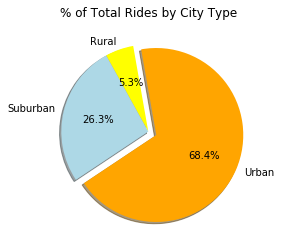

In [126]:
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["yellow", "lightblue", "orange"]
plt.pie(rides_pertype, explode=explode, labels=labels, colors=colors, autopct="%.1f%%", shadow=True, startangle=100)
plt.title("% of Total Rides by City Type")
plt.show()

In [127]:
# * % of Total Drivers by City Type
driver_citytype = city_read_pd.groupby(["type"])
driverSum_pertype = driver_citytype.sum()["driver_count"]
driverSum_pertype.head()

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

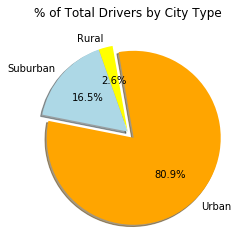

In [128]:
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["yellow", "lightblue", "orange"]
plt.pie(driverSum_pertype, explode=explode, labels=labels, colors=colors,autopct="%.1f%%", shadow=True, startangle=100)
plt.title("% of Total Drivers by City Type")

# Show Figure
plt.show()

## Three observable trends based on the data

In [ ]:
1. Bubble plot shows that urban cities have a lower average fare while rural cities, the highest.
This could be correlated to number of drivers available per city. 
Urban cities have a higher number of drivers while rural cities have less number of drivers.
This increase competition in urban cities, therefore fares are lower. 
2.